#Projeto Final do Módulo DS-PY-017 LÓGICA DE PROGRAMAÇÃO II (PY)

##Autores

- Lucas Andrade
- Nilo B. Silva Jr

##Simulação de Aeroporto

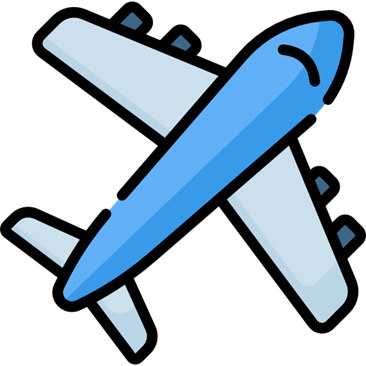

O objetivo deste exercício é simular os padrões de aterrissagem e decolagem em um aeroporto. 

Suponha um aeroporto que possui 3 pistas, numeradas 1, 2 e 3.

Existem 4 (quatro) "prateleiras" de espera para aterrissagem, duas para cada uma das pistas 1 e 2. Aeronaves que se aproximam do aeroporto devem se integrar a uma das prateleiras (filas) de espera, sendo que estas filas devem procurar manter o mesmo tamanho. Assim que um avião entra em uma fila de aterrissagem, ele recebe um número de identificação ID e outro número inteiro que indica o número de unidades de tempo que o avião pode permanecer na fila antes que ele tenha que descer (do contrário seu combustível termina e ele cai).

Existem também filas para decolagem, uma para cada pista. Os aviões que chegam nestas filas também recebem uma identificação ID. Estas filas também devem procurar manter o mesmo tamanho.

A cada unidade de tempo, de 0 a 3 aeronaves podem chegar às filas de decolagem e de 0 a 3 aeronaves podem chegar às prateleiras. A cada unidade de tempo, cada pista pode ser usada para um pouso ou uma decolagem. A pista 3 em geral só é usada para decolagens, a não ser que um dos aviões nas prateleiras fique sem combustível, quando então ela deve ser imediatamente usada para pouso. Se apenas uma aeronave está com falta de combustível, ela pousará na pista 3; se mais de um avião estiver nesta situação, as outras pistas poderão ser utilizadas (a cada unidade de tempo no máximo 3 aviões poderão estar nesta desagradável situação).

Utilize inteiros pares (ímpares) sucessivos para a ID dos aviões chegando nas filas de decolagem (aterrissagem). A cada unidade de tempo, assuma que os aviões entram nas filas antes que aterrissagem ou decolagem ocorram.

Projetar um algoritmo que não permita o crescimento excessivo das filas de aterrissagem ou decolagem.

Coloque os aviões sempre no final das filas, que não devem ser reordenadas.

A saída do programa deverá indicar o que ocorre a cada unidade de tempo, imprimindo:

a) o conteúdo de cada fila;

b) o tempo médio de espera para decolagem;

c) o tempo médio de espera para aterrissagem; e

d) o número de aviões que aterrissam sem reserva de combustível.

Os itens b e c acima devem ser calculados para os aviões que já decolaram ou pousaram,
respectivamente. A saída do programa deve ser auto-explicativa e fácil de entender.

A entrada pode ser criada manualmente, mas o melhor é utilizar um gerador de números aleatórios.

Para cada unidade de tempo, a entrada deve ter as seguintes informações:

a) número de aviões (0-3) chegando nas filas de aterrissagem com respectivas reservas de combustível (de 1 a 20 em unidades de tempo); e

b) número de aviões (0-3) chegando nas filas de decolagem.

___________________

##Libraries (Bibliotecas)

In [1]:
from random import randint, choices                                             #Import randint to randomly generate new planes and fuel, and choises to randomly generate plane Id
import string                                                                   #Import string to generate plane Id
from time import sleep                                                          #Import sleep to pause dashboard
from IPython.display import clear_output                                        #Import clear_output to clear and refresh dashboard
from copy import deepcopy                                                       #Import deepcopy to copy Lines, Shelves e Runways
import csv                                                                      #Import csv to save database

##Functions (Funções)

### Initial Menu (Menu Inicial)

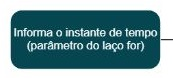

In [2]:
def initial_menu_options(test) -> tuple:
    '''
    User communication function
    Prints a menu that asks the user to inform what he wants to perform: tests (one or more rounds) or a simple operation (only one round). 
    Then it asks the user for how many instants of time he wants to run the code, and, if he has selected tests, the number of rounds he wants to run the program.
    Finally, it returns the number of rounds and the amount of time instants
    '''
    options = ''
    welcome_menssage = '\n{0:*^120}\n\n'\
                        '{1}\n'\
                        .format(' Welcome to ATO! The solution for optimize your Air Traffic! ','Parameterize your system now!')
    print(welcome_menssage)
    options = input('\nWhat do you want to do:\n\n'                                                                   # User options menu
                    'Tests --------------------------- 1\n'
                    'A Simple Operation -------------- 2\n\n'
                    'Select option: ')
    while handle_data_entry(input_data=options, input_type='selection'):                                              # Data entry handling
        options = input('\nWhat do you want to do:\n\n'
                    'Tests --------------------------- 1\n'
                    'A Simple Operation -------------- 2\n\n'
                    'Select option: ')

    if options == '1':
        clear_output(wait=False)
        print(welcome_menssage)
        number_tests = input('Enter the number of tests you want to run: ')                                          # Number of tests that the program will perform (User selection)
        while handle_data_entry(input_data=number_tests, input_type='int'):                                          # Data entry handling
            number_tests = input('\nEnter the number of tests you want to run: ')
        test = True
    else:
        number_tests = '1'

    clear_output(wait=False)
    print(welcome_menssage)
    instants_time = input('Enter the number of times the program should run: ')                                      # Number of times the program will be executed (User selection)
    while handle_data_entry(input_data=instants_time, input_type='int'):                                             # Data entry handling
        instants_time = input('\nEnter the number of times the program should run: ')

    return int(number_tests), int(instants_time), test                                                               # Return of the variables of the number of rounds and time instants that will be used in the for loop

#### Check user data entry (Verifica entrada de dados do Usuário)

In [3]:
def handle_data_entry(input_data: str, input_type: str) -> bool:
    '''
    Function for data entry manipulation
    It takes two parameters, the variable's value and its data type. From the conditions, 
    it returns a boolean that will be used by "while" to manipulate the data
    '''
    if input_type == 'int':                                                     # Query the type of data entered: int == integer
        if input_data.isdecimal() == False:                                                                       
            clear_output(wait=False)
            print('Whole numbers only, try again!')  
            return True          
    else:                                                                       # Query the type of data entered: selection == [1,2] or binary == ['y', 'n']
        if input_type == 'selection':                                                                                                                 
            list_options = ['1', '2']
        else:
            list_options = ['y', 'n']

        if input_data not in list_options:                                      # Query if the data informed through the parameter is contained in the list
            clear_output(wait=False)
            print('Option not found, try again!') 
            return True
    return False

### Fuel Decrease (Decremento de Combustível)


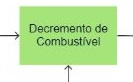

In [4]:
def fuel_decrease(shelves: list) -> list:
  '''
  Function to decrease of fuel
  Returns the shelves with the fuel of planes refreshed in minus 1 unit
  '''
  for shelf in range(len(shelves)):                                              # Browse each s in shelves
    for plane in range(len(shelves[shelf])):                                     # Browse each plane in shelf
      if shelves[shelf][plane]['fuel'] > 0:                                      # Check if fuel > 0 for fuel decrease in 1 unit
        shelves[shelf][plane]['fuel'] -= 1
  return shelves

### Check Plane Crashed (Verifica queda de avião)

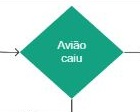

In [5]:
def plane_crashed(shelves: list, test: bool) -> bool:
  '''
  Function to check planes crashed
  Returns message with planes crashes and close the airport
  '''
  stop = False
  for shelf in range(len(shelves)):                                             # Browse each shelf in shelves
    for plane in range(len(shelves[shelf])):                                    # Browse each plane in shelf
      if shelves[shelf][plane]['fuel'] == 0:                                    # If fuel equal 0, plane crash!
        stop = True                                                             # If plane crashed returns True to stop program
        if not test:                                                            # Show message if is not a test
          print('{0:+^120}\n'\
                '{1:+^120}\n'\
                '{0:+^120}\n'\
                .format('', f'So sorry. The plane {shelves[shelf][plane]}'\
                        ' crashed!!!'))
  if stop and not test:                                                         # Show message if not test and plane crashed
    print('\n{0:=^120}\n'.format(' The Airport is closed now! '))     
  return stop

### Check Fuel Emergency (Verificar Emergência de Combustível)

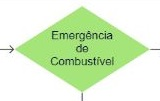

In [6]:
def check_fuel_emergency(shelves: list , planes_emergency: list) -> list:
  '''
  Function to check planes in fuel emergency
  If planes in fuel emergency, returns a flag and a list with planes in fuel emergency
  '''
  emergency = False
  for shelf in range(len(shelves)):                                                                  # Browse each shelf in shelves
    for plane in range(len(shelves[shelf])):                                                         # Browse each plane in shelf
      if shelves[shelf][plane]['fuel'] == 1 or (shelves[shelf][plane]['fuel'] == 2 and plane > 0):   # If fuel equal 1 or fuel =2 and not first in shelf, plane in fuel emergency!      
        planes_emergency.append([shelf, shelves[shelf][plane]])                                      # Add the shelf and plane index in emergency to list
        emergency = True
  return planes_emergency, emergency

### Landing of planes in fuel emergency (Pousando aviões em emergência de combustível)

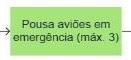

In [7]:
def landing_planes_fuel_emergency(planes_in_emergency: list, planes_on_the_shelf: list, planes_in_runways: list, times_to_arrival: list, time: int, arrival_in_emergency: int) -> tuple:
  '''
  Landing on fuel emergency using runway 3 as a priority.
  Maximum allowed of 3 simultaneous landings
  Tip: The planes_in_emergency list contents the shelf index and the plane
  '''
  num_planes_in_emergency = len(planes_in_emergency)                                   # Identifies the number of planes in emergency
  for n in range(min(3,num_planes_in_emergency)):
    planes_in_runways[2-n] = planes_in_emergency[0][1]                                 # Add first plane in emergency to runway
    planes_on_the_shelf[planes_in_emergency[0][0]].remove(planes_in_emergency[0][1])   # Remove first plane in emergency the shelf
    times_to_arrival.append(time - planes_in_emergency[0][1]['start_time'])            # Calculate the waiting time to arrival
    planes_in_emergency.remove(planes_in_emergency[0])                                 # Removes first plane in emergency the emergency list
    arrival_in_emergency += 1                                                          # Increase the arrival in emergency number in 1 unit
  return planes_in_emergency, planes_on_the_shelf, planes_in_runways, times_to_arrival, arrival_in_emergency

### Land or take off planes (Pouso ou decolagem de aviões)

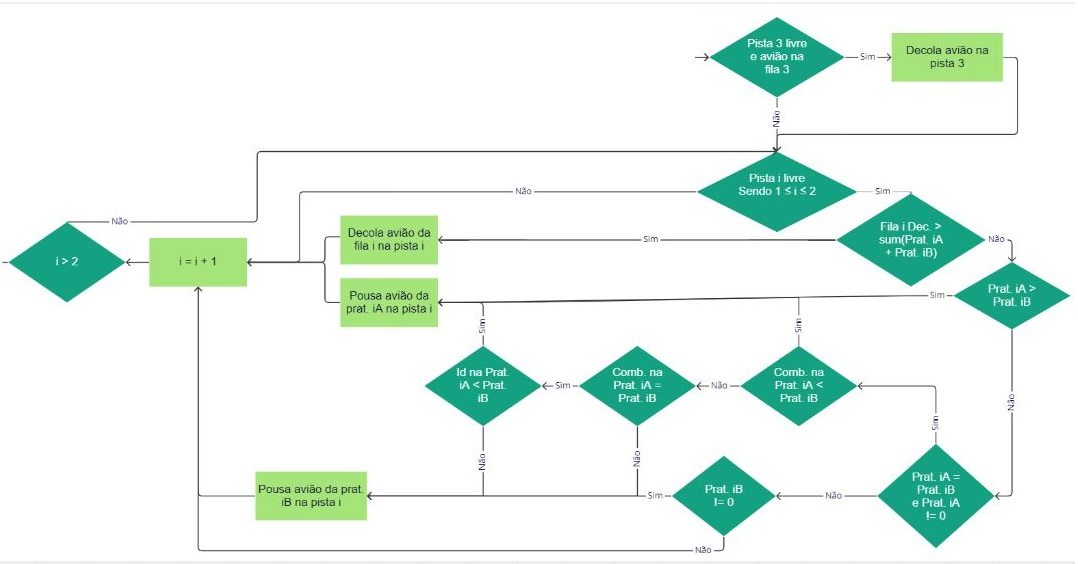

In [8]:
def landing_or_take_off(runway: int, planes_in_runways: list, planes_in_line: list, planes_on_the_shelf: list, times_to_departure: list, times_to_arrival: list) -> tuple:
  '''
  Function to arrival or departure in runways.
  Priority order:
  1 - If runway 3 free and plane on departure line 3, plane take off;
  2 - Identify which is the longest, arrival shelves or departure lines, if departure, plane take off;
  3 - Identify which is the longest shelf, A or B, and land the plane on the longest shelf;
  4 - If shelf A = B and shelf not empty, identify plane with less fuel and land the plane on the less fuel;
  5 - If planes fuel is the same, identify the plane with the lowest id and land the plane with the lowest id.
  '''
  #Deperture Planes in Runway 3
  if runway == 2:                                                                                                                  # If runway 3
    if planes_in_runways[runway] == '' and len(planes_in_line[runway])>0:
      planes_in_runways, times_to_departure,\
        planes_in_line = organize_runways(planes_in_runways = planes_in_runways,\
                                          times_to_arv_dep = times_to_departure,\
                                          planes_line_shelf = planes_in_line,\
                                          runway = runway, line_shelf = runway,\
                                          time = time)                                                                             # Trigger the Organize Runways Function to take off plane in runway 3

  else:                                                                                                                            # If runway 1 and 2
    if planes_in_runways[runway] == '':                                                                                            # Check if runway is empty
      a = runway                                                                                                                   # Shelf A index
      b = runway+2                                                                                                                 # Shelf B index
      lines_size = len(planes_in_line[runway])
      shelf_a_size = len(planes_on_the_shelf[a])
      shelf_b_size = len(planes_on_the_shelf[b])
      if lines_size > (shelf_a_size + shelf_b_size):                                                                               # Check which is the longest, arrival shelves or departure lines
        planes_in_runways, times_to_departure, planes_in_line = organize_runways(planes_in_runways = planes_in_runways, \
                                                                                times_to_arv_dep = times_to_departure, \
                                                                                planes_line_shelf = planes_in_line, \
                                                                                runway = runway, line_shelf = runway,\
                                                                                time = time)                                       # Trigger the Organize Runways Function to take off plane in runway
      elif shelf_a_size > shelf_b_size:                                                                                            # Check which is the longest shelf
        planes_in_runways, times_to_arrival, planes_on_the_shelf = organize_runways(planes_in_runways = planes_in_runways,\
                                                                                    times_to_arv_dep = times_to_arrival,\
                                                                                    planes_line_shelf = planes_on_the_shelf,\
                                                                                    runway = runway, line_shelf = a,\
                                                                                    time = time)                                   # Trigger the Organize Runways Function to land plane Shelf A in runway
      elif shelf_a_size == shelf_b_size and shelf_a_size != 0:                                                                     # Check if shelf size is the same
        if planes_on_the_shelf[a][0]['fuel'] < planes_on_the_shelf[b][0]['fuel']:                                                  # Check which plane is the less fuel level
          planes_in_runways, times_to_arrival, planes_on_the_shelf = organize_runways(planes_in_runways = planes_in_runways,\
                                                                                      times_to_arv_dep = times_to_arrival,\
                                                                                      planes_line_shelf = planes_on_the_shelf,\
                                                                                      runway = runway, line_shelf = a,\
                                                                                      time = time)                                 # Trigger the Organize Runways Function to land plane Shelf A in runway
        elif planes_on_the_shelf[a][0]['fuel'] == planes_on_the_shelf[b][0]['fuel']:                                               # Check if fuel level is the same
          if int(planes_on_the_shelf[a][0]['plane_id'][-3:]) < int(planes_on_the_shelf[b][0]['plane_id'][-3:]):                    # Check plane with lowest id
            planes_in_runways, times_to_arrival, planes_on_the_shelf = organize_runways(planes_in_runways = planes_in_runways,\
                                                                                        times_to_arv_dep = times_to_arrival,\
                                                                                        planes_line_shelf = planes_on_the_shelf,\
                                                                                        runway = runway, line_shelf = a,\
                                                                                        time = time)                               # Trigger the Organize Runways Function to land plane Shelf A in runway
          else:
            planes_in_runways, times_to_arrival, planes_on_the_shelf = organize_runways(planes_in_runways = planes_in_runways,\
                                                                                        times_to_arv_dep = times_to_arrival,\
                                                                                        planes_line_shelf = planes_on_the_shelf,\
                                                                                        runway = runway, line_shelf = b,\
                                                                                        time = time)                               # Trigger the Organize Runways Function to land plane Shelf B in runway
        else:
          planes_in_runways, times_to_arrival, planes_on_the_shelf = organize_runways(planes_in_runways = planes_in_runways,\
                                                                                      times_to_arv_dep = times_to_arrival,\
                                                                                      planes_line_shelf = planes_on_the_shelf,\
                                                                                      runway = runway, line_shelf = b,\
                                                                                      time = time)                                 # Trigger the Organize Runways Function to land plane Shelf B in runway
      elif shelf_b_size != 0:                                                                                                      # Check if shelf B is empty
        planes_in_runways, times_to_arrival, planes_on_the_shelf = organize_runways(planes_in_runways = planes_in_runways,\
                                                                                    times_to_arv_dep = times_to_arrival,\
                                                                                    planes_line_shelf = planes_on_the_shelf,\
                                                                                    runway = runway, line_shelf = b,
                                                                                    time = time)                                   # Trigger the Organize Runways Function to land plane Shelf B in runway
  return planes_in_runways, planes_in_line, planes_on_the_shelf, times_to_departure, times_to_arrival


#### Organizer Runways - Arrival/Departure (Organiza Pista Chegada/Partida)

In [9]:
def organize_runways(planes_in_runways: list, times_to_arv_dep: list, planes_line_shelf: list, runway: int, line_shelf: int, time: int) -> tuple:
  '''
  Function to add plane in runway and remove it on shelf/line and calculate waiting time 
  Returns refreshed runways, shelves/lines and times to arrival/departure
  '''
  planes_in_runways[runway] = planes_line_shelf[line_shelf][0]                  # Add first plane the shelf/line to runway
  times_to_arv_dep.append(time - planes_in_runways[runway]['start_time'])       # Calculate the waiting time to arrival/departure
  planes_line_shelf[line_shelf].remove(planes_line_shelf[line_shelf][0])        # Remove first plane the shelf/line
  return planes_in_runways, times_to_arv_dep, planes_line_shelf

### Organizer New Planes in Shelf/Lines (Organiza novos aviões na Prateleira de Chegada / Fila de Saída)

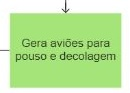

In [10]:
def organize_lines(last_id: int, lines: list, time: int, arrival: bool = True) -> tuple:         # Function to add new planes to the shelf/lines in arrival/departure
  '''
  Function to add new planes to arrival shelves/departure lines
  Returns a list with new planes to arrival shelves or departure lines and the last plane id used
  '''
  last_id, planes = new_planes(last_id = last_id, time = time, arrival = arrival)                # Trigger the New Planes Function 
  for plane in planes:                                                                           # Browse for each new plane
    if arrival:                                                                                  # Trigger the Shortest Line Function to select the shortest shelf/line to add the new plane
      lines[shortest_line(lines)].append(plane)                                                  # for arrival, prioritize shelves 1A, 2A, 1B and 2B if it is one of the shortest                                                  
    else:
      lines.reverse()
      lines[shortest_line(lines)].append(plane)                                                  # for departure, prioritize lines 3 to 1 if it is one of the shortest
      lines.reverse()      
  return last_id, lines

#### New Planes (Novos Aviões)

In [11]:
def new_planes(last_id: int, time: int, arrival: bool = True) -> tuple:                                                        # Function to random generation of new planes for arrival or departure (Função para geração aleatória de novos aviões para chegada ou partida)
  '''
  Function to random generation of new planes for arrival or departure.
  Randomly returns the number of new planes 
  ''' 
  PLANE = {'plane_id': None, 'fuel': None, 'start_time': None}
  planes = []
  for i in range(randint(0,3)):                                                                
    plane = PLANE.copy()
    last_id, id = plane_id(last_id = last_id)                                                    # Trigger the Plane ID Function to add ID for new plane and refresh last ID
    plane['plane_id'] = id                                                                       # Add ID to plane 
    plane['fuel'] = fuel(arrival = arrival)                                                      # Trigger the Fuel Function to add Fuel to plane 
    plane['start_time'] = time                                                                   # Add start time to plane 
    planes.append(plane)
  return last_id, planes

##### Plane ID (ID dos Aviões)

In [12]:
def plane_id(last_id: int) -> tuple:                                            # Function to increase plane ID (Função para incrementar o ID dos aviões)
  '''
  Function to increase plane ID
  Returns the next plane_id 
  '''
  ALPHABET = string.ascii_letters                                               
  last_id += 2                                                                  # Increase last id
  id = ''.join(choices(ALPHABET[26:], k = 3)) + '-' + str(last_id).zfill(3)     # Concatenates three alpha characters with three numbers characters to create id_plane                                   
  return last_id, id


##### Fuel (Combustível)


In [13]:
def fuel(arrival: bool = True) -> int:                                          # Function to random generation of fuel for arrival and constant fuel for departure
  '''
  Function to random generation of fuel for arrival and constant fuel for departure
  Randomly returns the arrival planes fuel or
  constant fuel equal 20 for departure planes
  ''' 
  return randint(2,20) if arrival else 20                                       # If arrival, random fuel between 2 and 20, otherwise constant fuel equal 20

#### Arrival Shortest Shelf / Departure Shortest Line (Menor Prateleira - Chegada / Menor Fila - Partida)

In [14]:
def shortest_line(lines: list) -> int:                                          # Function to identify the shortest shelf/line in arrival/departure
  '''
  Function to identify the shortest shelf/line in arrival/departure
  Returns the index of shortest arrival shelf/departure line
  '''
  lines_size = [len(line) for line in lines]                                    # Browse shelves/lines and append your size to lines_size
  return lines_size.index(min(lines_size))                                      # Return the shelf/line shortest index

### Dashboard (Painel de Controle)

In [15]:
def dashboard(shelves: list, lines: list, runways: list, time: int, emergency: int, time_departure: list, time_arrival: list, test: bool):
  '''
  Function to show Airport Dashboard
  Show the airport statistics, planes in arrival shelves, planes in departure line,
  and planes in runways
  '''
  num_departure, num_arrival, avg_departure_time, avg_arrival_time, num_planes_in_shelves,\
     num_planes_in_line, num_planes_runways = statistics(time_departure = time_departure,\
                                                         time_arrival = time_arrival,\
                                                         shelves = shelves, lines = lines,\
                                                         runways = runways)                             # Trigger the Statistics Function to calculate statistics of arrival and departure 

  if not test:
    shelves = remove_start_time(list_planes = deepcopy(shelves), name_list = 'shelves')                   # Trigger Remove Start Time Function to remove start_time attribute on plane to show on Dashboard 
    lines = remove_start_time(list_planes = deepcopy(lines), name_list = 'lines')                         # Trigger Remove Start Time function to remove start_time attribute on plane to show on Dashboard
    runways = remove_start_time(list_planes = deepcopy(runways), name_list = 'runways')                   # Trigger Remove Start Time function to remove start_time attribute on plane to show on Dashboard

    dep_arr = ['' if plane == '' else 'Departure. Good Trip! ' if int(plane['plane_id'][-3:])%2 == 0\
              else 'Arrival. Welcome! ' for plane in runways]                                           # Message of Good Trip for departure and Welcome for Arrival

    clear_output(wait=False)                                                                             # Clear the last Dashboard
                                                                                                        # Print the current Dashboard
    print('\n{0:*^120}\n'\
          '{1:-^120}\n'\
          '{0:*^120}\n\n'\
          '{2}'\
          '{18: >107}\n'\
          '{19}'\
          '{20: >99}\n'\
          '{17}'\
          '{21: >92}\n\n'\
          '{3:-^120}\n\n'\
          'Shelf 1A: {4}\n'\
          'Shelf 1B: {5}\n'\
          'Shelf 2A: {6}\n'\
          'Shelf 2B: {7}\n\n'\
          '{13:-^120}\n\n'\
          'Runway 1: {22}{14}\n'\
          'Runway 2: {23}{15}\n'\
          'Runway 3: {24}{16}\n\n'\
          '{9:-^120}\n\n'\
          'Line 1: {10}\n'\
          'Line 2: {11}\n'\
          'Line 3: {12}\n\n'\
          '{25:_>120}\n'\
          .format('*',' A I R  T R A F F I C  O P T I M I Z E R  D A S H B O A R D ', f'Time Now: {str(time).zfill(3)}', ' Arrival Shelves: ' +\
                  str(num_planes_in_shelves) + ' plane(s) wating ', shelves[0], shelves[2], shelves[1], shelves[3],'',\
                  ' Departure Lines: ' + str(num_planes_in_line) + ' plane(s) wating', lines[0], lines[1], lines[2],\
                  ' Runways: '+ str(num_planes_runways) + ' plane(s) in runways ', runways[0], runways[1], runways[2],\
                  f'Departure Average Time: {round(avg_departure_time,2):.2f}', f'Arrival in Emergency: {str(emergency).zfill(3)}',\
                  f'Departure Number: {str(num_departure).zfill(3)}', f'Arrival Number: {str(num_arrival).zfill(3)}',\
                  f'Arrival Average Time: {round(avg_arrival_time,2):.2f}', dep_arr[0], dep_arr[1], dep_arr[2], ' ATO v1.0'))

#### Statistics (Estatísticas)

In [16]:
def statistics(time_departure: list, time_arrival: list, shelves: list, lines: list, runways: list) -> tuple:
  '''
  Function to calculate the airport statistics
  Returns the departure and arrival quantitative, the average times departure
  and arrival and the planes quantitative on shelves, departure lines and runways
  '''
  num_departure = len(time_departure)                                                                              # Numbers of departure
  num_arrival = len(time_arrival)                                                                                  # Numbers of arrival

  avg_departure_time = sum(time_departure)/num_departure if num_departure > 0 else 0                               # Average departure times
  avg_arrival_time = sum(time_arrival)/num_arrival if num_arrival > 0 else 0                                       # Average arrival times

  num_planes_in_shelves = len(shelves[0])+len(shelves[1])+len(shelves[2])+len(shelves[3])                          # Numbers of planes in arrival shelves
  num_planes_in_line = len(lines[0]) + len(lines[1]) + len(lines[2])                                               # Numbers of planes in departure lines
  num_planes_runways = (1 if runways[0] != '' else 0) + (1 if runways[1] != '' else 0) +\
                       (1 if runways[2] != '' else 0)                                                              # Numbers of planes in runways

  airport_statistics.append([beta_test, time, num_departure, str(round(avg_departure_time,2)).replace('.',','),\
                             num_arrival, str(round(avg_arrival_time,2)).replace('.',','), arrival_in_emergency,\
                             num_planes_in_shelves, num_planes_runways , num_planes_in_line])                      # Add statistics from time in list

  return num_departure, num_arrival, avg_departure_time, avg_arrival_time, num_planes_in_shelves, num_planes_in_line, num_planes_runways

#### Remove start time from display in Dashboard (Remove o tempo inicial para exibição do Painel de Controle)

In [17]:
def remove_start_time(list_planes: list, name_list: str) -> list:
  '''
  Function to renove start time from display in Dashboard
  Returns a list with planes on runways/shelves/lines without the start time attribute
  '''
  if name_list == 'runways':                                                    # If runways
      for plane in list_planes:                                                 # Browse each plane in runways
          if plane != '':
              plane.pop('start_time')                                           # Remove the attribute start time
  else:                                                                         # If shelves or lines
      for row in list_planes:                                                   # Browse each shelf/line
          if row != []:
              for plane in row:                                                 # Browse each plane on shelf/line
                  plane.pop('start_time')                                       # Remove the attribute start time
  return list_planes

### Export Database (Exportar Banco de Dados)

In [18]:
def export_database(airport_statistics: list):
  '''
  Function to export database
  '''
  if test:                                                                                                   # If was executed test, export the database automatically
    clear_output(wait=False)
    print('Test finalized!')
    generate_database(airport_statistics)
    print('\nYour data test has been exported to "ATO_database.csv"\n'
          'The airport operation was terminated. Thank you for using our air traffic program!')
  else:                                                                                                      # Check if user want export database 
    export_data = input('\nDo you want to export the operation data? <y or n>: ').lower()                    # Confirm if the user wants to export the data obtained with the time instants
    while handle_data_entry(input_data=export_data, input_type='binary'):                                    # Data entry handling
      export_data = input('\nDo you want to export the operation data? <y or n>: ').lower()

    if(export_data == 'y'):                                                                                  # Condition for execution of the generate database function
      generate_database(airport_statistics)
      clear_output(wait=False)
      print('Your data has been exported to "ATO_database.csv"\n'
            'The airport operation was terminated. Thank you for using our air traffic program!')
    else:
      clear_output(wait=False)
      print('The airport operation was terminated. Thank you for using our air traffic program!')

#### Save systems logs (Salvar logs do sistema)

In [19]:
def generate_database(data: list):
    '''
    Function that generates a database
    The function receives as a parameter a list of lists containing the header 
    and data of each test with their respective time instants
    '''
    with open('ATO_Database.csv', 'w') as database:
      escritor = csv.writer(database, delimiter=';', lineterminator='\n')
      escritor.writerows(airport_statistics)

##Main (Principal)

In [20]:
airport_statistics = [['Test','Time Now','Departure Number','Departure Average Time','Arrival Number',\
                       'Arrival Average Time','Arrival in Emergency','Planes on Shelves',\
                       'Planes on Runways','Planes on Line']]                                                # Structure of system logs Database 

test = False
number_tests = ''
instants_time = ''

number_tests, instants_time, test = initial_menu_options(test)                                               # The variables: number of tests and time instants, receive their value from the initial menu function

if test:                                                                                                     # IF test, print message
  clear_output(wait=False)
  print('\nTest in progress. Please wait!\n')
  sleep(3)

for beta_test in range(1, int(number_tests) + 1):
  time = 0                                                                                                   # Time counter
  plane_id_arrival = -1                                                                                      # Arrival plane ID control initialization (numbers odd)
  plane_id_departure = 0                                                                                     # Departure Plane ID control initialization (numbers even)
  arrival_in_emergency = 0                                                                                   # Arrival in emergency counter
  stop = False

  planes_on_the_shelf = [[],[],[],[]]                                                                        # Plane arrival shelf control initialization [[Shelf 1A],[Shelf 2A],[Shelf 1B],[Shelf 2B]]
  planes_in_line = [[],[],[]]                                                                                # Plane departure line control initialization  [[Line 1],[Line 2],[Line 3]]
  times_to_arrival = []                                                                                      # Times to arrival list
  times_to_departure = []                                                                                    # Times to departure list


  for time in range(int(instants_time) + 1):
    planes_in_runways = ['','','']                                                                           # Plane runways control initialization [[Runway 1],[Runway 2],[Runway 3]]

    #Fuel Decrease
    planes_on_the_shelf = fuel_decrease(shelves = planes_on_the_shelf)                                       # Trigger Fuel Decrease Function to airplanes on the shelf
    
    #Plane Crashed
    if plane_crashed(shelves = planes_on_the_shelf, test = test):                                            # Trigger Plane Crashed Function to check any chash
      break                                                                                                  # If Plane Crashed, stop airport
    
    #Check Fuel Emergency
    planes_in_emergency = []                                                                                 # Plane in emergency control initialization  []
    planes_in_emergency, out_of_fuel = check_fuel_emergency(shelves = planes_on_the_shelf ,\
                                                            planes_emergency = planes_in_emergency)          # Trigger Check Fuel Emergency Function to identify planes in emergency

    #Land Planes in Emergency
    if out_of_fuel:
      planes_in_emergency, planes_on_the_shelf, planes_in_runways, times_to_arrival,\
        arrival_in_emergency = landing_planes_fuel_emergency(planes_in_emergency = planes_in_emergency,\
                                                            planes_on_the_shelf = planes_on_the_shelf,\
                                                            planes_in_runways = planes_in_runways,\
                                                            times_to_arrival = times_to_arrival,\
                                                            time = time, arrival_in_emergency =\
                                                            arrival_in_emergency)                            # Trigger Landing Planes Fuel Emergency Function to landing planes in emergency
    
    #Land or take off in Runways
    for runway in range(2,-1,-1):
      planes_in_runways, planes_in_line, planes_on_the_shelf, times_to_departure,\
        times_to_arrival = landing_or_take_off(runway = runway, planes_in_runways =\
                                              planes_in_runways,planes_in_line = planes_in_line,\
                                              planes_on_the_shelf = planes_on_the_shelf,\
                                              times_to_departure = times_to_departure,\
                                              times_to_arrival = times_to_arrival)                           # Trigger Landing or Take Off Function to landing/take off planes in runways 1 and 2
      
    #New Planes to Arrival
    plane_id_arrival, planes_on_the_shelf = organize_lines(last_id = plane_id_arrival,\
                                                          lines = planes_on_the_shelf,\
                                                          time = time)                                       # Trigger Organize Lines Function to airplanes on the shelf

    #New Planes to Departure
    plane_id_departure, planes_in_line = organize_lines(last_id = plane_id_departure,\
                                                        lines = planes_in_line,\
                                                        time = time, arrival = False)                        # Trigger Organize Lines Function to airplanes in line


    #Dashboard
    dashboard(shelves = planes_on_the_shelf, lines = planes_in_line,\
              runways = planes_in_runways, time = time, emergency = arrival_in_emergency,\
              time_departure = times_to_departure, time_arrival = times_to_arrival, test = test)             # Trigger the Dashboard Function to print dashboard

    if not test:                                                                                             # Sleep only if not test
      sleep(3)                                                                                               # Pause to review the information contained in the dashboard

else:
  export_database(airport_statistics)                                                                        # Trigger the Export Database to export Database

The airport operation was terminated. Thank you for using our air traffic program!
